In [1]:
from google.colab import files
uploaded = files.upload()

Saving Country Code.xlsx to Country Code.xlsx
Saving zomato.csv to zomato.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_zomato = pd.read_csv('zomato.csv', encoding = 'latin1' ) # encoding error occured, so latin1 is used to over come the error
df_Countrycode = pd.read_excel('Country Code.xlsx')


In [4]:
df_zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df_Countrycode.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
df_zomato.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df_zomato.shape

(9551, 21)

In [8]:
df_Countrycode.shape

(15, 2)

In [9]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df_zomato.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [11]:
df_zomato['Cuisines'].isnull().sum() * 100 / len(df_zomato)

np.float64(0.09423097057899696)

In [12]:
df_zomato.drop(columns=['Locality Verbose', 'Address'],
               axis =1,
               inplace = True)

In [13]:
df_zomato.drop(columns=['Restaurant ID','Longitude', 'Latitude'],
               axis =1,
               inplace = True)

In [14]:
df_zomato.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [15]:
df_zomato.describe()

,Country Code,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748
std,56.750546,16121.183073,0.905609,1.516378,430.169145
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000


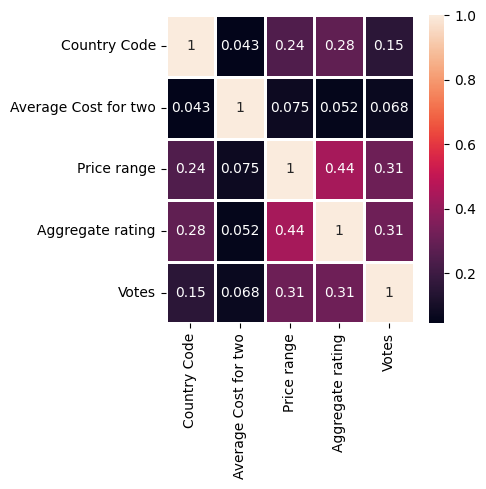

In [16]:
# Select only numerical features for correlation analysis
numerical_features = df_zomato.select_dtypes(include=np.number).columns
df_zomato_numerical = df_zomato[numerical_features]

# Calculate the correlation matrix

correlation_matrix = df_zomato_numerical.corr()

plt.figure(figsize=(4,4))
sns.heatmap(correlation_matrix,
            annot=True,
            linewidth=1)
plt.show()

In [17]:
df_zomato.rename({'Has Table booking' : 'Tables_Available',
                  'Rating text' : 'Ratings',
                  'Average Cost for two' : 'Avg_Cost',
                  'Has Online delivery' : 'Online_Delivery',
                  'Is delivering now' : 'Delivery_Available_Now'},
                  axis = 1,
                  inplace = True)

In [18]:
df_zomato.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality', 'Cuisines',
       'Avg_Cost', 'Currency', 'Tables_Available', 'Online_Delivery',
       'Delivery_Available_Now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Ratings', 'Votes'],
      dtype='object')

In [19]:
#taking subsets
subset_df = df_zomato[['Aggregate rating', 'Rating color', 'Ratings', 'Votes']]
subset_df.head()

,Aggregate rating,Rating color,Ratings,Votes
0,4.8,Dark Green,Excellent,314
1,4.5,Dark Green,Excellent,591
2,4.4,Green,Very Good,270
3,4.9,Dark Green,Excellent,365
4,4.8,Dark Green,Excellent,229


In [20]:
subset_df['Rating color'].value_counts()

,count
Rating color,
Orange,3737
White,2148
Yellow,2100
Green,1079
Dark Green,301
Red,186


In [23]:
301/9551

0.03151502460475343

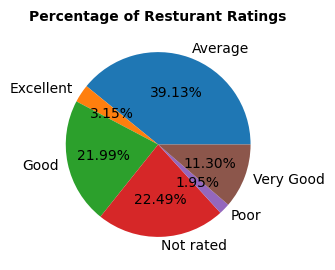

In [24]:
plt.figure(figsize = (3,3))
plt.title("Percentage of Resturant Ratings", fontsize = 10, fontweight = 'bold')
gb = df_zomato.groupby("Ratings").agg({'Ratings' : "count"})
plt.pie(gb['Ratings'], labels = gb.index, autopct = "%1.2f%%")
plt.show()

In [25]:
result_rating = subset_df.groupby('Rating color')[['Aggregate rating', 'Ratings']].aggregate(['min', 'max'])
result_rating

Aggregate rating         Ratings           
                          min  max        min        max
Rating color                                            
Dark Green                4.5  4.9  Excellent  Excellent
Green                     4.0  4.4  Very Good  Very Good
Orange                    2.5  3.4    Average    Average
Red                       1.8  2.4       Poor       Poor
White                     0.0  0.0  Not rated  Not rated
Yellow                    3.5  3.9       Good       Good

<Axes: xlabel='Aggregate rating'>

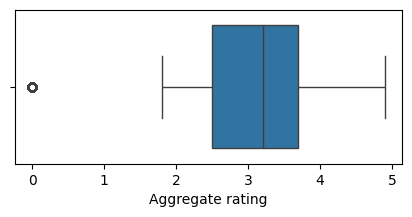

In [26]:
plt.figure(figsize = (5,2))
sns.boxplot(data = df_zomato, x = 'Aggregate rating')
# 75 percent of the agg rating lie between 2.5 to 3.5

In [27]:
#join operation
join_df = pd.merge(left = df_zomato,
                   right = df_Countrycode,
                   left_on = 'Country Code',
                   right_on = 'Country Code',
                   how = 'inner')
join_df.head()

,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Tables_Available,Online_Delivery,Delivery_Available_Now,Switch to order menu,Price range,Aggregate rating,Rating color,Ratings,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [28]:
join_df.shape

(9551, 17)

In [29]:
# .loc function on country and currency
# filter multiple rows and columns
# use loc tto get the rows and columns
currency_df = join_df.loc[:, ['Country Code','Country', 'Currency']]
currency_df.value_counts()

,,,count
Country Code,Country,Currency,
1,India,Indian Rupees(Rs.),8652
216,United States,Dollar($),434
215,United Kingdom,Pounds(£),80
214,UAE,Emirati Diram(AED),60
189,South Africa,Rand(R),60
30,Brazil,Brazilian Real(R$),60
148,New Zealand,NewZealand($),40
208,Turkey,Turkish Lira(TL),34
14,Australia,Dollar($),24


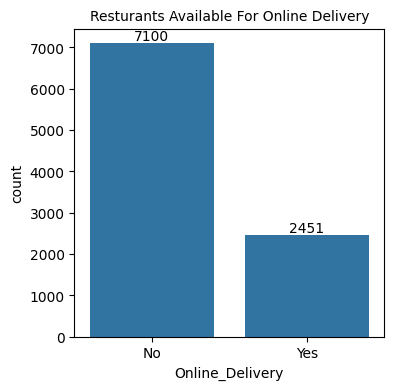

In [30]:
plt.figure(figsize = (4,4))
plt.title("Resturants Available For Online Delivery", fontsize = 10)
ax= sns.countplot(x = 'Online_Delivery', data = join_df)
ax.bar_label(ax.containers[0])
plt.show()

In [31]:
perc_penetration =  join_df.Country.value_counts() * 100 / len(join_df['Country'])
perc_penetration

,count
Country,
India,90.587373
United States,4.544027
United Kingdom,0.837609
Brazil,0.628206
South Africa,0.628206
UAE,0.628206
New Zealand,0.418804
Turkey,0.355984
Australia,0.251283


In [32]:
# country names
country_names = join_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [33]:
# just country values
country_values = join_df.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

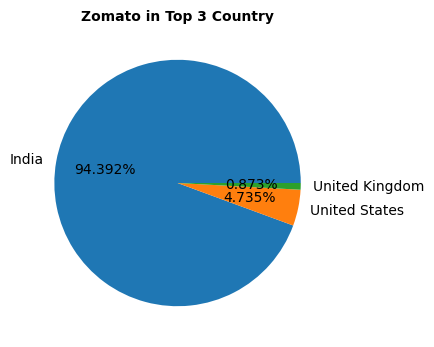

In [34]:
plt.figure(figsize = (4,4))
plt.title("Zomato in Top 3 Country", fontsize = 10, fontweight = 'bold')
plt.pie(country_values[:3], labels = country_names[:3], autopct = "%1.3f%%")
plt.show()

In [35]:
join_df.groupby(['Country', 'Online_Delivery']).size().reset_index()

,Country,Online_Delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


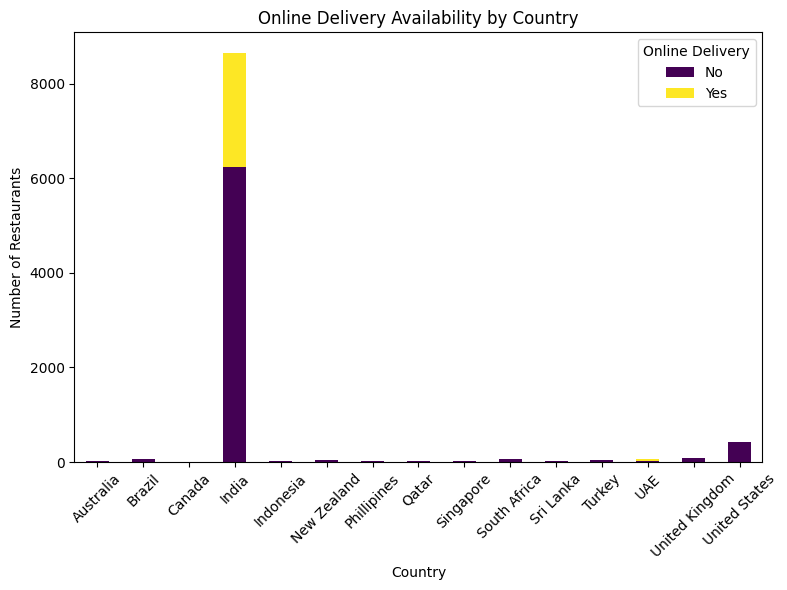

In [38]:
data = {
    "Country": ["Australia", "Brazil", "Canada", "India", "India", "Indonesia", "New Zealand", "Phillipines", "Qatar",
                "Singapore", "South Africa", "Sri Lanka", "Turkey", "UAE", "UAE", "United Kingdom", "United States"],
    "Online_Delivery": ["No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No"],
    "Count": [24, 60, 4, 6229, 2423, 21, 40, 22, 20, 20, 60, 20, 34, 32, 28, 80, 434]
}

df = pd.DataFrame(data)

df_pivot = df.pivot(index="Country", columns="Online_Delivery", values="Count").fillna(0)

df_pivot.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")

plt.title("Online Delivery Availability by Country")
plt.xlabel("Country")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.legend(title="Online Delivery")

plt.tight_layout()
plt.show()

In [39]:
join_df[join_df['Online_Delivery'] == 'Yes'].Country.value_counts()

,count
Country,
India,2423
UAE,28


In [40]:
join_df[join_df['Online_Delivery'] == 'No'].Country.value_counts()

,count
Country,
India,6229
United States,434
United Kingdom,80
Brazil,60
South Africa,60
New Zealand,40
Turkey,34
UAE,32
Australia,24


In [41]:
Indian_cities = join_df[join_df['Country']== 'India']
Indian_cities.shape

(8652, 17)

In [42]:
city_count = Indian_cities.City.value_counts()
city_count

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Guwahati,21
Lucknow,21
Bhubaneshwar,21
Ahmedabad,21


In [43]:
city_count[:5]

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25


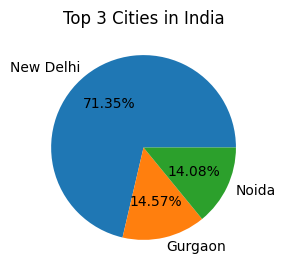

In [44]:
plt.figure(figsize=(3, 3))
plt.title("Top 3 Cities in India")
plt.pie(city_count.values[:3],
        labels=city_count.index[:3],
        autopct="%1.2f%%")
plt.show()

<ipython-input-46-c80400ab750d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=join_df[col], data=join_df, ax=axes[i], palette=rating_palette)


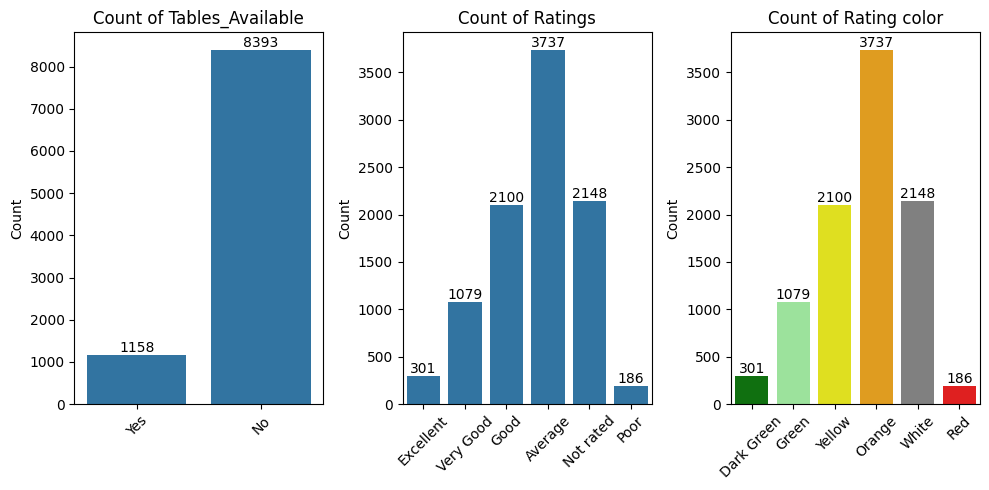

In [46]:
columns = ['Tables_Available', 'Ratings', 'Rating color']

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

rating_palette = ['green', 'lightgreen', 'yellow', 'orange', 'gray', 'red']

# Loop through columns and create count plots
for i, col in enumerate(columns):
    if col == "Rating color":
        ax = sns.countplot(x=join_df[col], data=join_df, ax=axes[i], palette=rating_palette)
    else:
        ax = sns.countplot(x=join_df[col], data=join_df, ax=axes[i])

    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [47]:
#avg cost for two per country
join_df.groupby('Country')['Avg_Cost'].mean().sort_values(ascending = False).round(1)

,Avg_Cost
Country,
Indonesia,281190.5
Sri Lanka,2375.0
Phillipines,1606.8
India,623.4
South Africa,419.7
Qatar,223.8
UAE,166.4
Singapore,155.8
Brazil,134.7


In [48]:
Indian_cities.groupby('City')['Avg_Cost'].mean().sort_values(ascending = False).round(1)[:8]

,Avg_Cost
City,
Panchkula,2000.0
Hyderabad,1361.1
Pune,1337.5
Jaipur,1310.0
Kolkata,1272.5
Bangalore,1232.5
Goa,1175.0
Ludhiana,1160.0


<ipython-input-49-3deb9e538103>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Price range", data=join_df, palette='rocket_r')


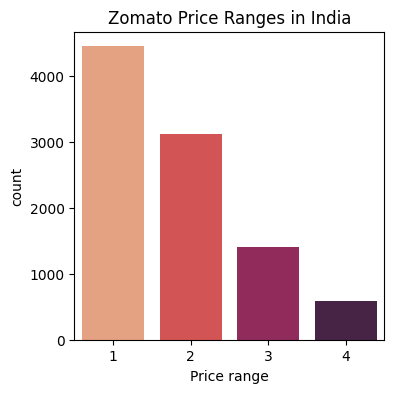

In [49]:
plt.figure(figsize=(4, 4))
plt.title("Zomato Price Ranges in India")
sns.countplot(x="Price range", data=join_df, palette='rocket_r')
plt.show()